# Analysis IMDB

### About

The aim of this project is to complete the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).
IMDb is an online database of information related to films, television series, podcasts, home videos, video games, and streaming content online 


### Dataset

The IMDB dataset used in this project was obtained from [kaggle](https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data).

### Content

Here's a data set of 1,000 most popular movies on IMDB in the last 10 years. The data points included are:

Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore

## Downloading the Dataset

Let's begin installing all the necessary modules.

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/PromptCloudHQ/imdb-data' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dimitrovspython
Your Kaggle Key: ········


100%|██████████| 134k/134k [00:00<00:00, 186kB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './imdb-data'

In [6]:
import os
os.listdir(data_dir)

['IMDB-Movie-Data.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "imdb-movie-analysis" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dimitrov-s-dev/imdb-movie-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dimitrov-s-dev/imdb-movie-analysis


'https://jovian.com/dimitrov-s-dev/imdb-movie-analysis'

## Data Preparation and Cleaning

We will import the pandas module to load the .csv file into a data frame for further analysis and explore some basic info from the data frame such as: columns info, statistics, incorrect/invalid data, etc.


In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('./imdb-data/IMDB-Movie-Data.csv')

1.Display top 10 rows of the Dataset

In [13]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


2.Find shape of our Dataset (number of rows & number of columns)

In [14]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of cols: {cols}")

Number of rows: 1000
Number of cols: 12


3.Get information about our Dataset like total number rows, total number of columns, datatypes of each column and memory requirement

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


4.Check Null values In The Dataset

In [16]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

Lets Visualize it with sns heatmap

In [17]:
import seaborn as sns

<AxesSubplot:>

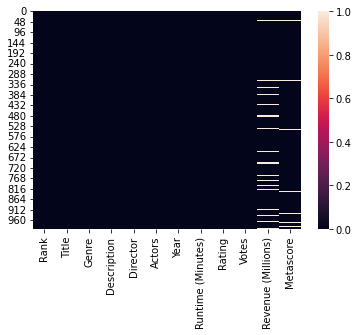

In [18]:
sns.heatmap(df.isnull())

5.Check for duplicate Data and drop them

In [19]:
dup = df.duplicated().any()
print(f"Are there any duplicated values in the data? {dup}")

Are there any duplicated values in the data? False


6.Drop All the Missing Values

In [20]:
per_missing = df.isnull().sum() / len(df) * 100
per_missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [21]:
df.dropna(axis=0) # in place= False as default - in order not to modify the data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


7.Get Overall Statistic about the Dataset

In [22]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [23]:
import jovian

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dimitrov-s-dev/imdb-movie-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dimitrov-s-dev/imdb-movie-analysis


'https://jovian.com/dimitrov-s-dev/imdb-movie-analysis'

## Exploratory Analysis and Visualization

Before we asked questions about Udemy courses, let's see some graphs that will help us to understand the data we are analysing.

Let's begin by importingmatplotlib.pyplot and seaborn.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - In what year there was the highest average voting?

In [28]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [29]:
#Graph the year with highest average voting
df.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

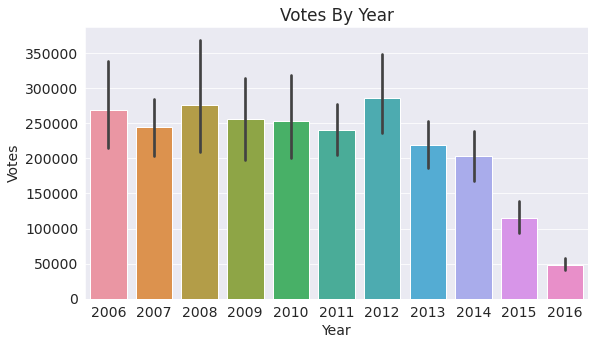

In [41]:
# Bar Plot 
sns.barplot(x='Year', y="Votes", data=df)
plt.title("Votes By Year")
plt.show()

**TODO** - In what year was the highest average revenue ?

In [28]:
# Highest avg revenue
df.groupby("Year")["Revenue (Millions)"].mean().sort_values(ascending=False)

Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

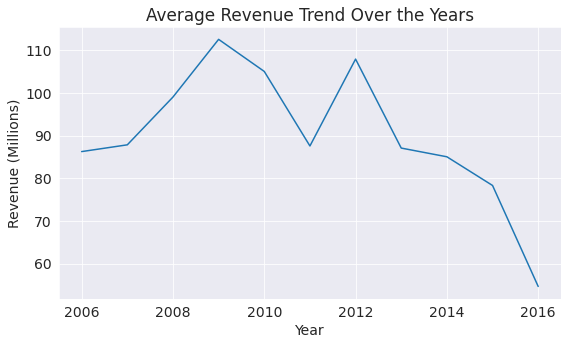

In [42]:
# Line Plot 
sns.lineplot(x="Year", y="Revenue (Millions)", data=df, ci=None)
plt.title("Average Revenue Trend Over the Years")
plt.show()

**TODO** - Top 10 Movie titles by runtime

In [30]:
# Graph with top 10 Movies by runtime
df.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

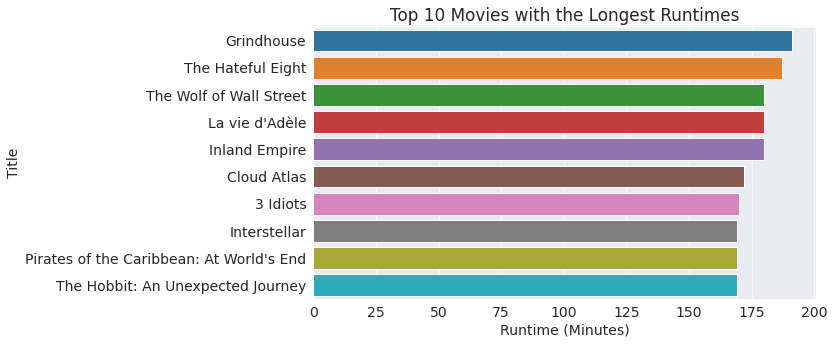

In [44]:
# Hirizontal Bar Plot 
top_10_length = df.nlargest(10, "Runtime (Minutes)")
sns.barplot(x="Runtime (Minutes)", y="Title", data=top_10_length)

plt.title("Top 10 Movies with the Longest Runtimes")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Title")

plt.show()

**TODO** - Top 10 Movies Genre Number by Votes

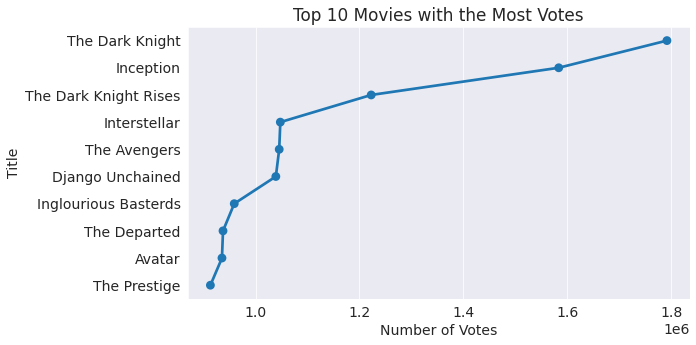

In [45]:
## Pinplot 
top_10_votes = df.nlargest(10, "Votes")[["Title", "Votes"]].set_index("Title")
sns.pointplot(x="Votes", y=top_10_votes.index, data=top_10_votes, markers="o")

plt.title("Top 10 Movies with the Most Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Title")

plt.show()

**TODO** - Number of Movie per year

In [34]:
#Number of Movie per year
df["Year"].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

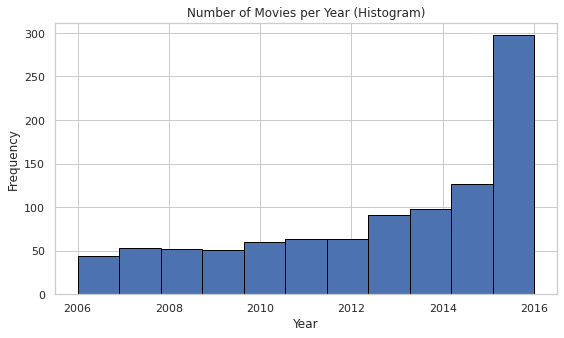

In [50]:
# Histogram
sns.set(style="whitegrid")
plt.hist(data=df, x='Year', bins=len(df['Year'].unique()), edgecolor='black')

plt.title("Number of Movies per Year (Histogram)")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

Top 10 Highest rated Movie Titles and its Directors

In [51]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [52]:
top_10_rating = df.nlargest(10,"Rating")[["Title", "Rating", "Director"]].set_index("Title")

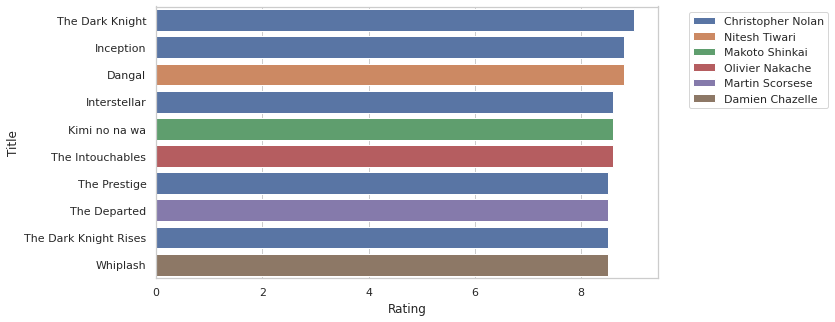

In [53]:
sns.barplot(x="Rating", y=top_10_rating.index, data=top_10_rating, hue="Director", dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dimitrov-s-dev/imdb-movie-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dimitrov-s-dev/imdb-movie-analysis


'https://jovian.com/dimitrov-s-dev/imdb-movie-analysis'

## Asking and Answering Questions

The exploratory analysis and visualization gave us a general idea of the data set we are analyzing. Let's ask some specific questions and try to answer them making some queries to our data frame.




#### Q1: TODO - Find the most popular Movie title as per Highest revenue.

In [56]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [57]:
df[df["Revenue (Millions)"].max() ==  df["Revenue (Millions)"]]["Title"]

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

#### Q2: TODO - Top 10 Highest Revenue Movie Titles

In [58]:
top_10 = df.nlargest(10, "Revenue (Millions)")[["Title", "Revenue (Millions)"]].set_index("Title")

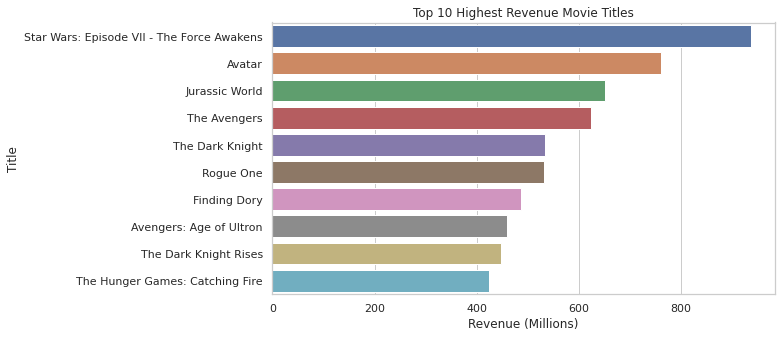

In [59]:
sns.barplot(x="Revenue (Millions)", y=top_10.index, data=top_10)
plt.title("Top 10 Highest Revenue Movie Titles")
plt.show()

#### Q3: TODO - Find  Average Rating of Movies Year wise

In [60]:
df.groupby("Year")["Rating"].mean().sort_values(ascending=False)

Year
2007    7.133962
2006    7.125000
2009    6.960784
2012    6.925000
2011    6.838095
2014    6.837755
2010    6.826667
2013    6.812088
2008    6.784615
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

#### Q4: TODO - Does Rating reflect the Revenue?

In [61]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

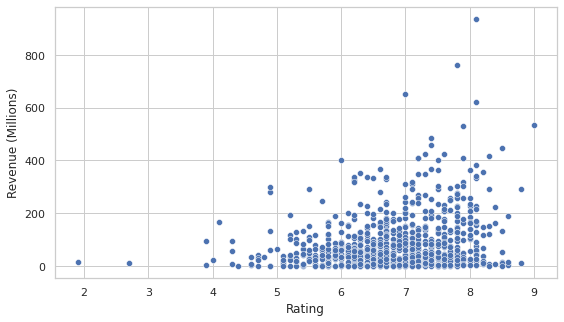

In [62]:
sns.scatterplot(x="Rating", y="Revenue (Millions)", data=df)

Yes it does as per the Graph 

#### Q5: TODO - Classify Movies Based on Rating [Excellent, Good and Average]

In [63]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [64]:
def rating(rating):
    if rating >= 7.0:
        return "Excellent"
    elif rating >= 6.0:
        return "Good"
    else:
        return "Average"

In [65]:
df["rating_cat"] = df["Rating"].apply(rating)

In [66]:
df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent


New Column with rating_cat was created

#### Q6: TODO - Count Number of Action Movies.

In [67]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

In [68]:
df["Genre"].dtype

dtype('O')

In [69]:
len(df[df["Genre"].str.contains("Action", case=False)])

303

#### Q7: TODO -  Unique Values from Genre.

In [70]:
df["Genre"]

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

lets first split the Genres and put them in a list

In [71]:
list = []
for value in df["Genre"]:
    list.append(value.split(","))

In [72]:
list

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

lets make it only one dimention

In [73]:
one_element = []

In [74]:
for elem in list:
    for item in elem:
        one_element.append(item)

In [75]:
one_element

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [76]:
uni_list = []
for gen in one_element:
    if gen not in uni_list:
        uni_list.append(gen)

In [77]:
uni_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

In [78]:
len(uni_list)

20

#### Q8: TODO -  How Many Films of Each Genre Were Made?

lets use the uni_list from previous task

In [79]:
one_element
for elem in list:
    for item in elem:
        one_element.append(item)

In [80]:
one_element

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

Lets import Counter from collections

In [81]:
from collections import Counter

In [82]:
Counter(one_element)

Counter({'Action': 606,
         'Adventure': 518,
         'Sci-Fi': 240,
         'Mystery': 212,
         'Horror': 238,
         'Thriller': 390,
         'Animation': 98,
         'Comedy': 558,
         'Family': 102,
         'Fantasy': 202,
         'Drama': 1026,
         'Music': 32,
         'Biography': 162,
         'Romance': 282,
         'History': 58,
         'Crime': 300,
         'Western': 14,
         'War': 26,
         'Musical': 10,
         'Sport': 36})

In [83]:
import jovian

In [84]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dimitrov-s-dev/imdb-movie-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dimitrov-s-dev/imdb-movie-analysis


'https://jovian.com/dimitrov-s-dev/imdb-movie-analysis'

## Inferences and Conclusion

IMDB is great platform that offers a big number of Movies.

These are some conclusions obtained during the analysis:

2012 was e great year as per Revenue and Votes.
The most popular Movie Title as per voting was The Dark as well as most popular one.
The most popular and with highest Revenue is Star Wars: Episode VII - The Force Awakens - no surprise here.
And Final answer is that rating does reflect the revenue.

In [85]:
import jovian

In [86]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dimitrov-s-dev/imdb-movie-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dimitrov-s-dev/imdb-movie-analysis


'https://jovian.com/dimitrov-s-dev/imdb-movie-analysis'

## References and Future Work

**REFERENCES:** 
      
   -  stackoverflow.com 
   -  google.com
   - pandas.pydata.org, 
   - matplotlib.org
   - seaborn.pydata.org
   - kaggle.com


**FUTURE WORK:**
   - Power BI

In [87]:
import jovian

In [88]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dimitrov-s-dev/imdb-movie-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dimitrov-s-dev/imdb-movie-analysis


'https://jovian.com/dimitrov-s-dev/imdb-movie-analysis'